In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(caret)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [3]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [4]:
dim(players)
dim(sessions)

[1] 196   7

[1] 1535    5

In [5]:
group_count <- players |>
               count(subscribe)

group_count

subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


The main outcome variable in the dataset is `subscribe`, which indicates whether a player subscribed to the newsletter. There will be two values or groups that are in this variable: `TRUE` (subscribed) or `FALSE` (did not subscribe). After running the code, we found 52 players that are `FALSE` and 144 players that are `TRUE`. This makes `subscribe` a binary categorical variable and appropriate for classification tasks in a predictive modeling context.

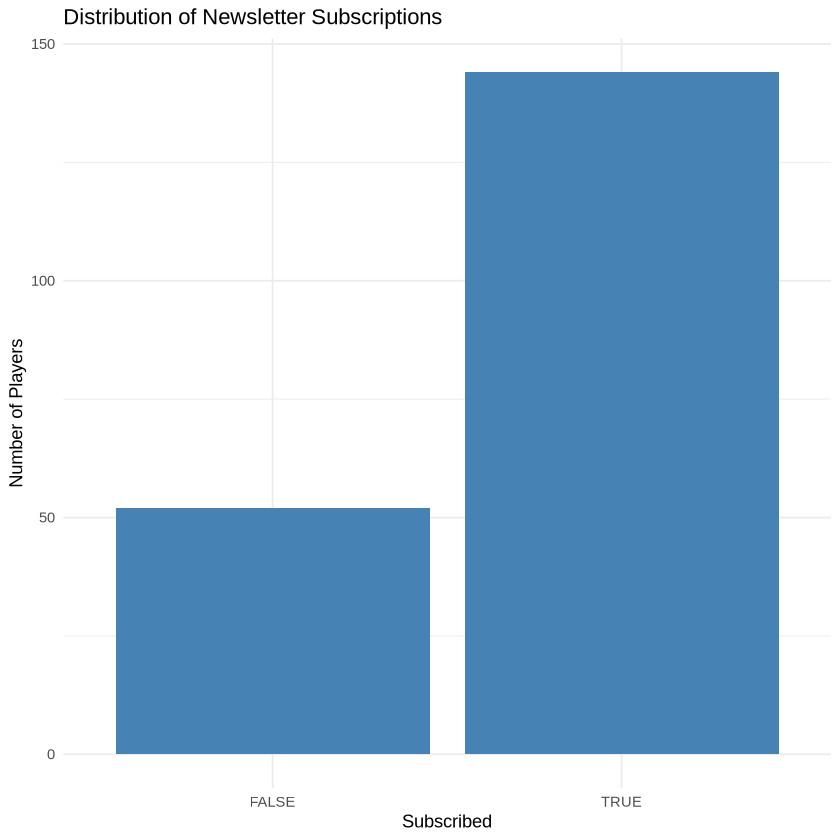

In [6]:
distribution_outcome <- ggplot(players, aes(x = subscribe)) +
                        geom_bar(fill = "steelblue") +
                        labs(title = "Distribution of Newsletter Subscriptions",
                                 x = "Subscribed",
                                 y = "Number of Players") +
                        theme_minimal()

distribution_outcome

The bar chart illustrates the distribution of the `subscribe` variable, which represents whether the players subscribed to the newsletter or not. Out of the total players, 144 players subscribed (`TRUE`), while 52 players did not (`FALSE`).

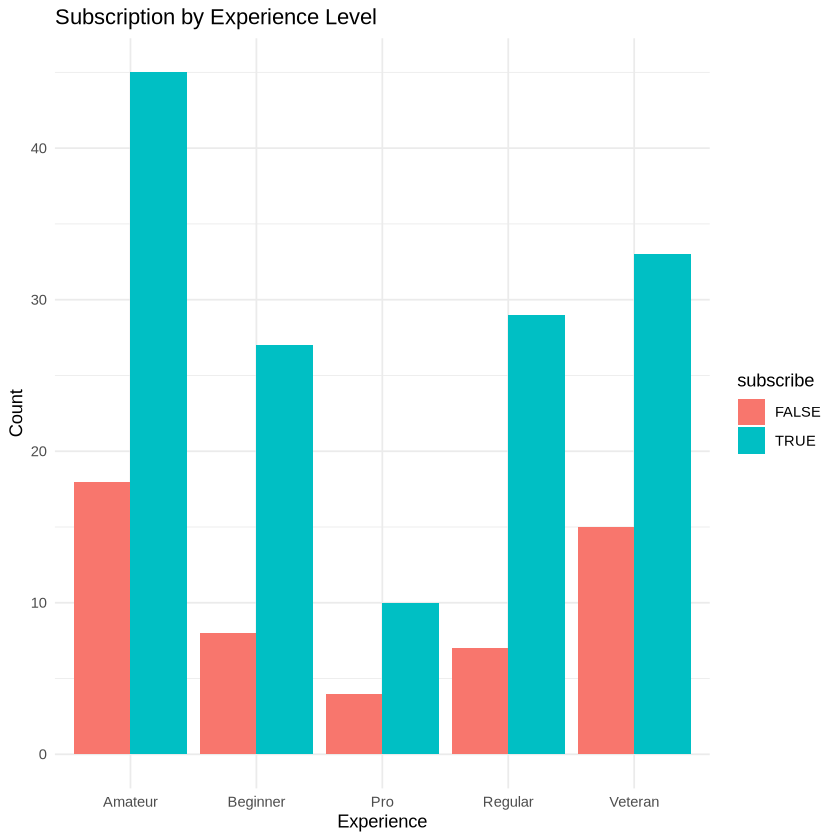

In [7]:
relationship_exp_subs <- ggplot(players, aes(x = experience, fill = subscribe)) +
                        geom_bar(position = "dodge") +
                        labs(title = "Subscription by Experience Level",
                                 x = "Experience",
                                 y = "Count") +
                        theme_minimal()

relationship_exp_subs

This grouped bar chart shows how the `subscribe` variable varies across different player experience levels. Amateurs and Veterans show the highest number of subscribers overall. Moreover, Pros have the lowest number of total players and also the smallest number of subscribers. The visualization suggests that experience may be related to subscription behavior. This point was proved with intermediate and experienced players tend to subscribe more frequently.

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


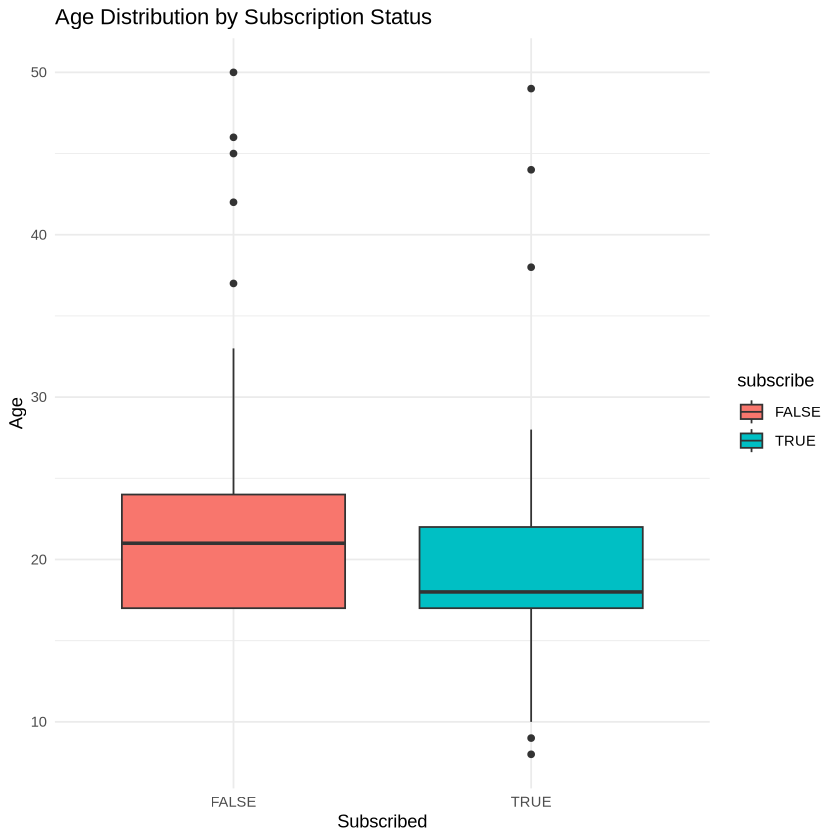

In [8]:
relationship_age_subs <- ggplot(players, aes(x = subscribe, y = Age, fill = subscribe)) +
                         geom_boxplot() +
                         labs(title = "Age Distribution by Subscription Status",
                                  x = "Subscribed",
                                  y = "Age") +
                         theme_minimal()

relationship_age_subs

The boxplot compares the distribution of players by age between those who subscribed to the newsletter (`TRUE`) and those who did not (`FALSE`). The median age of subscribers is slightly lower than that ones those who did not. This suggests that younger players are slightly more likely to subscribe, while older heads appear to be more reluctant to subscribe. 

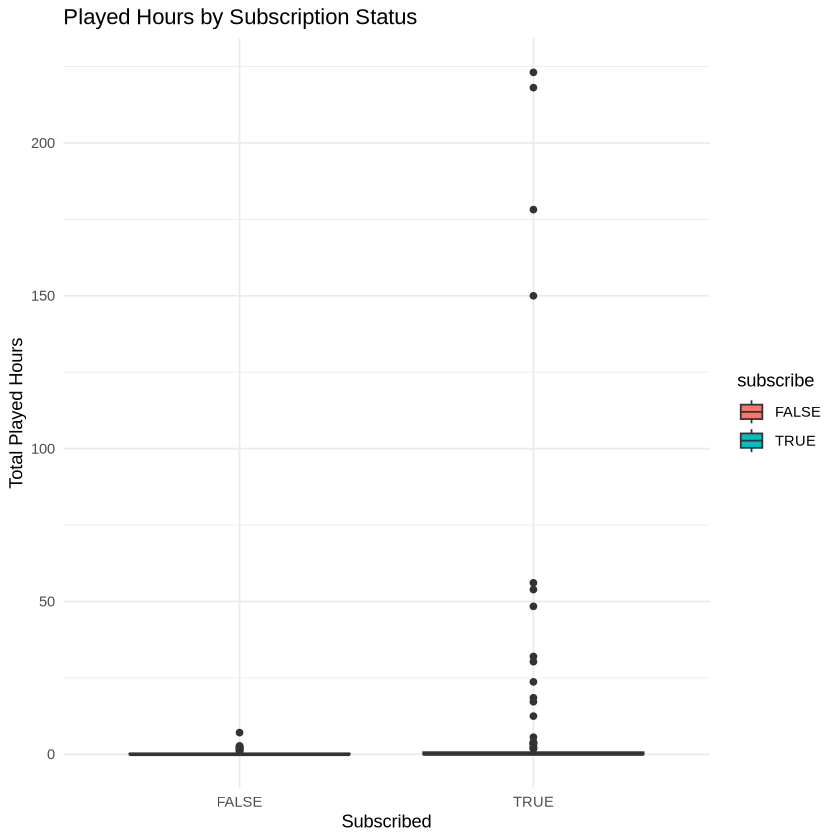

In [9]:
relationship_ph_subs <- ggplot(players, aes(x = subscribe, y = played_hours, fill = subscribe)) +
                        geom_boxplot() +
                        labs(title = "Played Hours by Subscription Status",
                                 x = "Subscribed",
                                 y = "Total Played Hours") +
                        theme_minimal()

relationship_ph_subs

The boxplot displays the distribution of total played hours of players who subscribe (`TRUE`) and those who do not (`FALSE`). Both groups have many players with low total playtime. The median hours played is higher for subscribers. The range and number of high-playtime players are noticeably greater in the subscribed group. This suggests that players who engage more deeply with a game may be more likely to subscribe to the newsletter. 

To sum up, the visualizations reveal clear correlations or relationships related to newsletter subscription. The overall distribution of the `subscribe` variable illustrates that the majority of the players chose to subscribe, but it creates a moderately imbalanced dataset. When broken down by `experience` level, subscription rates appear to be higher for most players with more gameplay exposure, especially Amateurs and Veterans. If we look back to the `Age` section, it suggests that subscribers tend to be slightly on the younger spectrum. Finally, total `played-hours` show a greater distribution among subscribers. These trends suggest that `experience`, `Age`, and `played_hours` behavior can be a useful predictor in a classification model. 

In this part, we will prepare the dataset for modeling by cleaning and tidying the raw data to be more pleasant. The session timestamps will be converted to numeric durations. This feature will be merged into the original player dataset. In addition, we also handled missing values by replacing them with 0. The final cleaned dataset is ready for use in building a predictive model.

In [10]:
sessions <- sessions |>
  mutate(start_time = dmy_hm(start_time),
         end_time = dmy_hm(end_time),
         session_duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins")))

sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time,session_duration_minutes
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12,36
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12,11
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12,122
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,1.71317e+12,1.71317e+12,9
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,1.72688e+12,1.72689e+12,17
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,1.71894e+12,1.71894e+12,18


In [11]:
session_summary <- sessions |>
  group_by(hashedEmail) |>
  summarise(total_sessions = n(),
            avg_session_duration = mean(session_duration_minutes, na.rm = TRUE),
            total_play_duration = sum(session_duration_minutes, na.rm = TRUE))

session_summary

hashedEmail,total_sessions,avg_session_duration,total_play_duration
<chr>,<int>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,53.000000,106
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,30.000000,30
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,11.000000,11
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13,32.153846,418
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2,35.000000,70
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1,10.000000,10
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,1,50.000000,50
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41,29.682927,1217
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,1,18.000000,18


In [12]:
player_data <- players |>
  left_join(session_summary, by = "hashedEmail")

player_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_sessions,avg_session_duration,total_play_duration
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,74.77778,2019
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,85.00000,255
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,5.00000,5
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,50.00000,50
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,9.00000,9
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1,5.00000,5
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1,13.00000,13


In [13]:
player_data <- player_data |>
  mutate(total_sessions = replace_na(total_sessions, 0),
         avg_session_duration = replace_na(avg_session_duration, 0),
         total_play_duration = replace_na(total_play_duration, 0))

player_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_sessions,avg_session_duration,total_play_duration
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,74.77778,2019
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,85.00000,255
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,5.00000,5
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,50.00000,50
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,9.00000,9
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0,0.00000,0
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,0,0.00000,0
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1,5.00000,5
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1,13.00000,13


In this part, a regression model was performed to predict whether a player subscribes to the news letter based on demographic and behavioral features. Using cleaned and merged data, we selected key predictors including age, total played hours, number of sessions, average session duration, and total play duration. Moreover, the dataset was split into training (70%) and testing (30%) sets. 

The results show that session-based features, especially playtime and engagement, are a valuable metric to distinguish subscribers from non-subscribers. Therefore, this model provides a solid baseline for understanding how player behavior correlates with subscription likelihood. 

In [14]:
sessions <- sessions |>
  mutate(start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time),
    session_duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins")))

session_summary <- sessions |>
  group_by(hashedEmail) |>
  summarise(total_sessions = n(),
    avg_session_duration = mean(session_duration_minutes, na.rm = TRUE),
    total_play_duration = sum(session_duration_minutes, na.rm = TRUE))

player_data <- players |>
  left_join(session_summary, by = "hashedEmail") |>
  mutate(total_sessions = replace_na(total_sessions, 0),
    avg_session_duration = replace_na(avg_session_duration, 0),
    total_play_duration = replace_na(total_play_duration, 0),
    Age = if_else(is.na(Age), median(Age, na.rm = TRUE), Age),
    subscribe = as.factor(subscribe),
    experience = as.factor(experience),
    gender = as.factor(gender))

model_data <- player_data |>
  select(subscribe, Age, played_hours, total_sessions, avg_session_duration, total_play_duration)

set.seed(123)

split <- initial_split(model_data, prop = 0.7, strata = subscribe)
train_data <- training(split)
test_data <- testing(split)

model <- train(
  subscribe ~ .,
  data = train_data,
  method = "glm",
  family = "binomial",
  trControl = trainControl(method = "none"))

predictions <- predict(model, newdata = test_data)

confusionMatrix(predictions, test_data$subscribe)

results <- test_data |>
  select(subscribe) |>
  mutate(predicted = predictions)

head(results)

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `start_time = dmy_hm(start_time)`.
Caused by warning:
! All formats failed to parse. No formats found.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE     1    1
     TRUE     15   43
                                          
               Accuracy : 0.7333          
                 95% CI : (0.6034, 0.8393)
    No Information Rate : 0.7333          
    P-Value [Acc > NIR] : 0.566759        
                                          
                  Kappa : 0.0551          
                                          
 Mcnemar's Test P-Value : 0.001154        
                                          
            Sensitivity : 0.06250         
            Specificity : 0.97727         
         Pos Pred Value : 0.50000         
         Neg Pred Value : 0.74138         
             Prevalence : 0.26667         
         Detection Rate : 0.01667         
   Detection Prevalence : 0.03333         
      Balanced Accuracy : 0.51989         
                                          
       'Positive' Class : FALSE           
                     

subscribe,predicted
<fct>,<fct>
TRUE,TRUE
TRUE,TRUE
FALSE,TRUE
TRUE,TRUE
FALSE,TRUE
TRUE,TRUE
